In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

In [39]:
combined_df = pd.read_csv('Data.csv')

C:\Users\devan\AppData\Local\Temp\ipykernel_15128\1828824327.py:1: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('Data.csv')


In [40]:
combined_df.describe()

,Round,Money,Num Players,GameNumber
count,587189.000000,587189.000000,587188.000000,587188.000000
mean,6.485714,26442.852281,5.014299,5006.095050
std,3.569238,20097.197261,0.812367,2890.482065
min,1.000000,0.000000,4.000000,1.000000
25%,3.000000,13000.000000,4.000000,2503.000000
50%,6.000000,20000.000000,5.000000,5003.000000
75%,9.000000,38000.000000,6.000000,7511.000000
max,14.000000,222000.000000,6.000000,10000.000000


In [51]:
combined_df.sample(500).head()

,Unnamed: 0,Player,phase,Round,Money,Properties,Player Index,Num Players,GameNumber,winner,PlayerIndex
506534,506534,AuctioneerBot,buying,3,22000,"[15, 24, 9]",4,5.0,8638.0,SmartBot,AuctioneerBot4
341583,341583,CheapskateBot,buying,4,18000,"[7, 18, 29, 21]",1,4.0,5823.0,RandomBot,CheapskateBot1
195844,195844,AuctioneerBot,buying,5,8000,"[28, 2, 19, 6, 4]",3,6.0,3339.0,SmartBot,AuctioneerBot3
136741,136741,GreedyBot,buying,6,0,"[23, 5, 6, 8, 1, 2]",4,5.0,2332.0,GreedyBot,GreedyBot4
377692,377692,CheapskateBot,buying,5,14000,"[4, 11, 7, 13, 16]",1,5.0,6440.0,SmartBot,CheapskateBot1


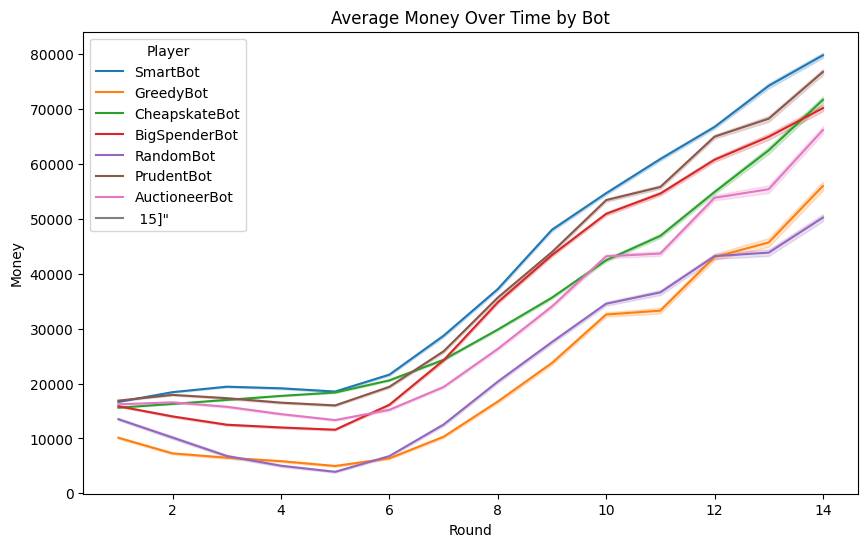

In [41]:
plt.figure(figsize=(10,6))
plt.subplot(1, 3, 1)
sns.lineplot(data=combined_df, x='Round', y='Money', hue='Player')
plt.title('Average Money Over Time by Bot')
plt.show()


In [74]:
# Calculate the weighted mean and confidence intervals for each player

# Calculate the confidence intervals
df_summary = combined_df.groupby(['Num Players', 'Player'])['Money'].agg(['mean', 'sem']).reset_index()

# Calculate the weights as the inverse of the variance
df_summary['weight'] = 1 / df_summary['sem']**2

# Calculate the weighted average performance for each player
df_summary['weighted_mean'] = df_summary['mean'] * df_summary['weight']
weighted_means = round(df_summary.groupby('Player')['weighted_mean'].sum() / df_summary.groupby('Player')['weight'].sum(), -1)


print(weighted_means.sort_values())

Player
GreedyBot        16790.0
RandomBot        18240.0
AuctioneerBot    25930.0
CheapskateBot    27130.0
BigSpenderBot    28830.0
PrudentBot       31760.0
SmartBot         33890.0
dtype: float64


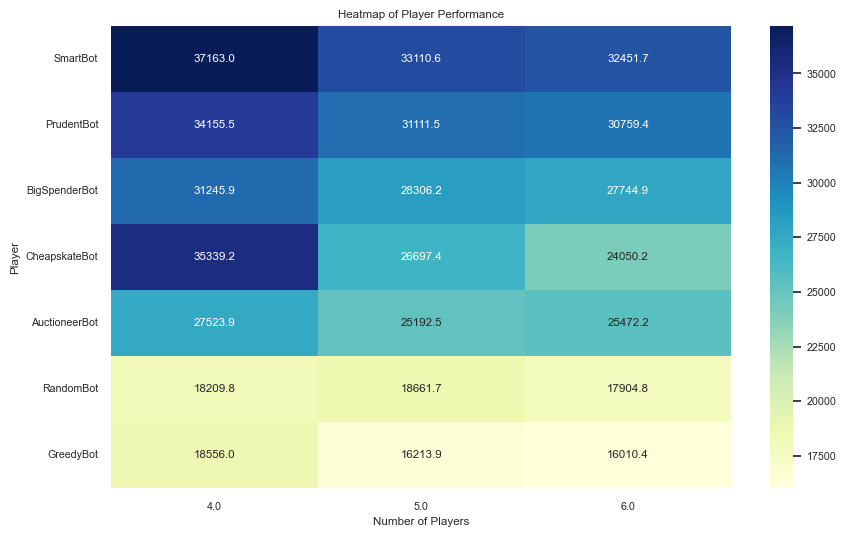

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean performance and standard error for each player in each game
df_summary = combined_df.groupby(['Num Players', 'Player'])['Money'].agg(['mean', 'sem']).reset_index()

# Calculate the weights as the inverse of the variance
df_summary['weight'] = 1 / df_summary['sem']**2

# Calculate the weighted mean performance for each player
df_summary['weighted_mean'] = df_summary['mean'] * df_summary['weight']
weighted_means = df_summary.groupby('Player')['weighted_mean'].sum() / df_summary.groupby('Player')['weight'].sum()

# Create a DataFrame of players and their overall weighted means
player_means = pd.DataFrame({'Player': weighted_means.index, 'OverallWeightedMean': weighted_means.values})

# Merge this DataFrame with the original summary DataFrame
df_summary = pd.merge(df_summary, player_means, on='Player')

# Sort the DataFrame by the overall weighted means
df_summary = df_summary.sort_values('OverallWeightedMean', ascending=False)

# Create a pivot table
pivot_table = df_summary.pivot(index='Player', columns='Num Players', values='mean')

# Reindex the pivot table to maintain the order of players
sorted_players = df_summary['Player'].unique()
pivot_table = pivot_table.reindex(sorted_players)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Heatmap of Player Performance')
plt.xlabel('Number of Players')
plt.ylabel('Player')
plt.show()


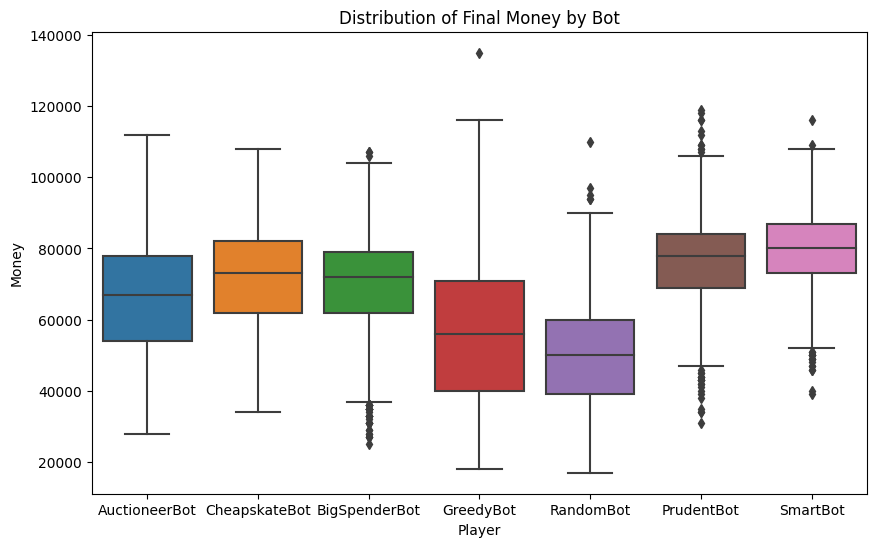

In [42]:
final_round = combined_df['Round'].max()
final_money = combined_df[combined_df['Round'] == final_round]

plt.figure(figsize=(10,6))
sns.boxplot(data=final_money, x='Player', y='Money')
plt.title('Distribution of Final Money by Bot')
plt.show()


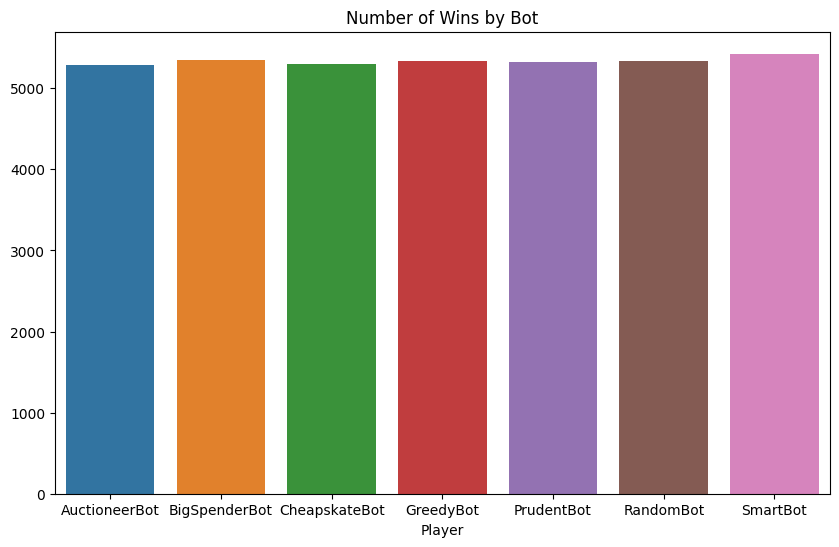

In [43]:
wins = combined_df.groupby(['GameNumber', 'Player'])['Money'].max().reset_index().groupby('Player').size()

plt.figure(figsize=(10,6))
sns.barplot(x=wins.index, y=wins.values, errorbar="sd")
plt.title('Number of Wins by Bot')
plt.show()

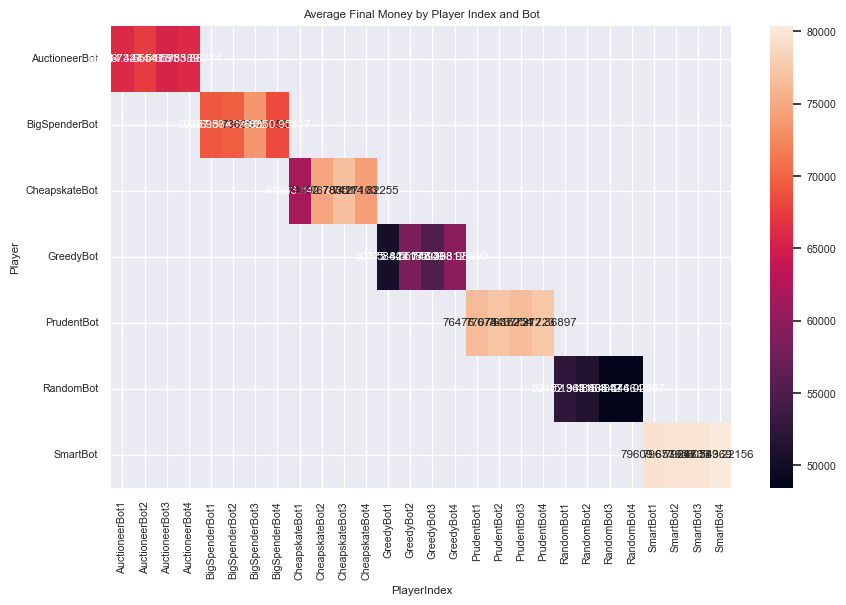

In [44]:
pivot = final_money.pivot_table(values='Money', index='Player', columns='PlayerIndex', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.set(font_scale=0.7)
sns.heatmap(pivot, annot=True, fmt=".5f")
plt.title('Average Final Money by Player Index and Bot')
plt.show()


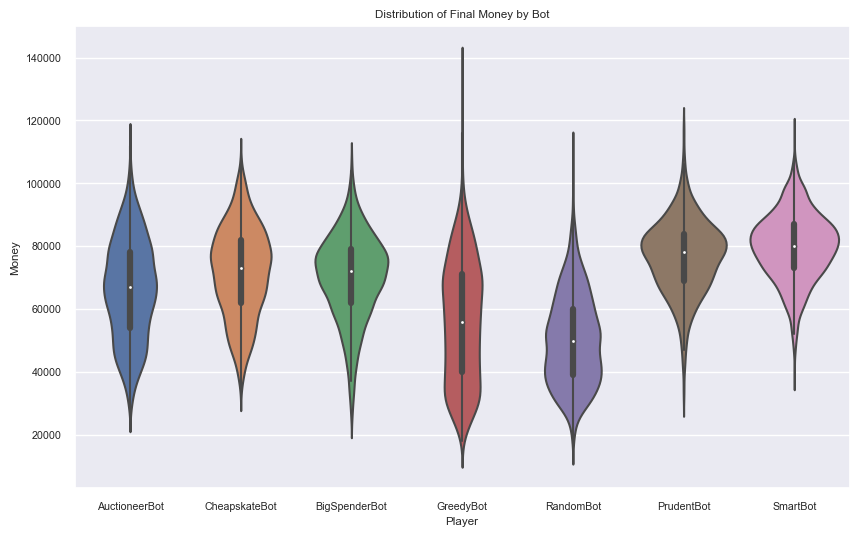

In [45]:
final_round = combined_df['Round'].max()
final_money = combined_df[combined_df['Round'] == final_round]

plt.figure(figsize=(10,6))
sns.violinplot(data=final_money, x='Player', y='Money')
plt.title('Distribution of Final Money by Bot')
plt.show()


In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(data=combined_df, x='Round', y='Properties', hue='Player')
plt.title('Average Properties Over Time by Bot')
plt.show()


KeyboardInterrupt: 

In [15]:
summary = combined_df[combined_df['phase']  == 'buying']
summary = summary[combined_df['Round']  == 7]

summary['Property_sum'] = summary['Properties'].apply(lambda x: np.sum(np.array(eval(x))))


summary.head()

C:\Users\devan\AppData\Local\Temp\ipykernel_15128\125140306.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summary = summary[combined_df['Round']  == 7]


,Unnamed: 0,Player,phase,Round,Money,Properties,Player Index,Num Players,GameNumber,winner,PlayerIndex,Property_sum
6,6,GreedyBot,buying,7,0,"[28, 2, 6, 4, 5, 3, 11]",1,4,1,RandomBot,GreedyBot1,59
20,20,RandomBot,buying,7,1000,"[19, 24, 15, 21, 30, 18, 25]",2,4,1,RandomBot,RandomBot2,152
34,34,RandomBot,buying,7,1000,"[22, 27, 7, 8, 10, 16, 13]",3,4,1,RandomBot,RandomBot3,103
48,48,RandomBot,buying,7,0,"[12, 17, 14, 29, 20, 26, 23]",4,4,1,RandomBot,RandomBot4,141
242,242,GreedyBot,buying,7,15000,"[19, 14, 29, 20, 24, 27, 23]",1,4,5,GreedyBot,GreedyBot1,156


C:\Users\devan\AppData\Local\Temp\ipykernel_15128\1439305976.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summary = summary[combined_df['Round']  == 7]


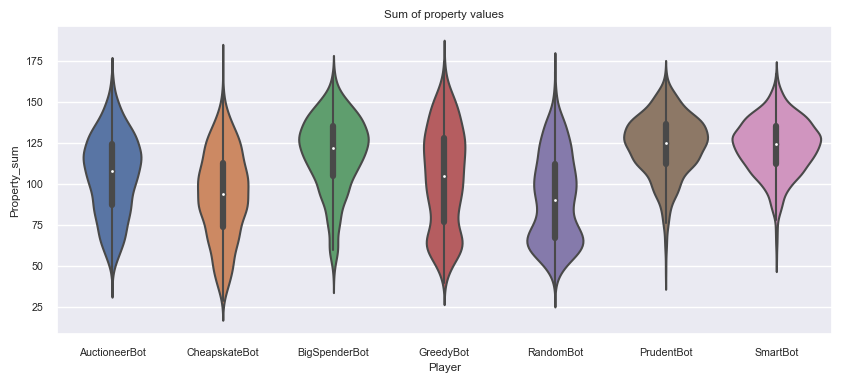

In [47]:
summary = combined_df[combined_df['phase']  == 'buying']
summary = summary[combined_df['Round']  == 7]

summary['Property_sum'] = summary['Properties'].apply(lambda x: np.sum(np.array(eval(x))))



plt.figure(figsize=(10,4))
sns.violinplot(data=summary, x='Player', y='Property_sum')
plt.title('Sum of property values')
plt.show()


In [24]:
final_round = combined_df.groupby('GameNumber').tail(1)

allprops = combined_df[combined_df['phase'] == 'buying']
allprops = allprops.groupby('GameNumber').tail(1)
allprops['Property_sum'] = allprops['Properties'].apply(lambda x: np.sum(np.array(eval(x))))


merged_df = final_round.merge(allprops[['GameNumber', 'Property_sum']], on='GameNumber', how='left')

merged_df.head()

,Unnamed: 0,Player,phase,Round,Money,Properties,Player Index,Num Players,GameNumber,winner,PlayerIndex,Property_sum
0,55,RandomBot,selling,14,68000,[],4,4,1,RandomBot,RandomBot4,141
1,115,RandomBot,selling,10,68000,[],6,6,2,CheapskateBot,RandomBot6,107
2,175,GreedyBot,selling,12,71000,[],5,5,3,RandomBot,GreedyBot5,93
3,235,GreedyBot,selling,10,54000,[],6,6,4,GreedyBot,GreedyBot6,92
4,291,RandomBot,selling,14,60000,[],4,4,5,GreedyBot,RandomBot4,102


AttributeError: 'numpy.int64' object has no attribute 'get'

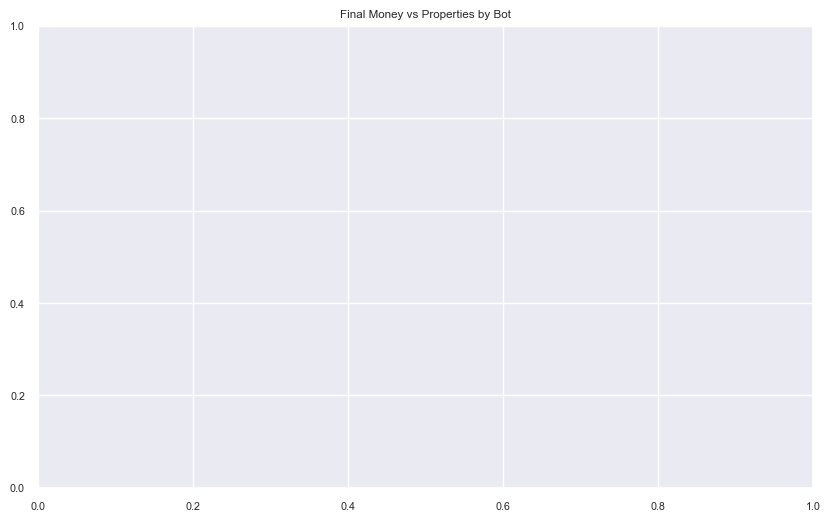

In [48]:
from matplotlib.lines import Line2D

plt.figure(figsize=(10,6))

plt.title('Final Money vs Properties by Bot')

sns.violinplot(x='Num Players', y='Money', hue='Player', data=final_round)
plt.show()

